# Data Loading & Pre- cleaning

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_excel('statefloracatalogdata.xlsx', sheet_name='StateFlora')

In [3]:
df.head()

,Type,Genus,Tube colour,Botanical name,Common name,States,NW,LE,NU,GT,...,Spread (m),Rain (mm),Soil texture,Soil pH,Frost,Flower colour,Flower (time),License,Attribution link,Attribution Label
0,Trees and Shrubs,Acacia,B,acinacea,round-leaved wattle,"SA, N,V",NaN,NaN,I,I,...,1-2,300,"Sa,Lo,Cl",ANC,R,Y,"W,Sp",CC-BY,http://www.environment.sa.gov.au/our-places/St...,State Flora
1,Trees and Shrubs,Acacia,B,anceps,Port Lincoln wattle,"SA, W",NaN,NaN,I,NaN,...,1-3,250,"Sa,Li",ANC,M,Y,"Sp,S",CC-BY,http://www.environment.sa.gov.au/our-places/St...,State Flora
2,Trees and Shrubs,Acacia,B,aneura,mulga,"SA,Q,N,W,NT",I,I,I,I,...,3-6,150,"Sa,Lo,Li",ANC,R,Y,"W,Sp",CC-BY,http://www.environment.sa.gov.au/our-places/St...,State Flora
3,Trees and Shrubs,Acacia,B,argyrophylla,golden-grey mulga,"SA,V",NaN,NaN,NaN,NaN,...,2-6,350,"Sa,Lo,Li",ANC,R,Y,"W,Sp",CC-BY,http://www.environment.sa.gov.au/our-places/St...,State Flora
4,Trees and Shrubs,Acacia,B,baileyana var. purpurea,purple Cootamundra wattle,Form,NaN,NaN,NaN,NaN,...,4-7,500,"Lo,Cl",AN/C,R,Y,"W,Sp",CC-BY,http://www.environment.sa.gov.au/our-places/St...,State Flora


In [4]:
df.columns

Index(['Type', 'Genus', 'Tube colour', 'Botanical name', 'Common name',
       'States', 'NW', 'LE', 'NU', 'GT', 'FR', 'EA', 'EP', 'NL', 'MU', 'YP',
       'SL', 'KI', 'SE', 'Height (m)', 'Spread (m)', 'Rain (mm)',
       'Soil texture', 'Soil pH', 'Frost', 'Flower colour', 'Flower (time)',
       'License', 'Attribution link', 'Attribution Label'],
      dtype='object')

In [5]:
df = df[['Type', 'Genus', 'Tube colour', 'Botanical name', 'Common name',
       'States','Height (m)', 'Spread (m)', 'Rain (mm)',
       'Soil texture', 'Soil pH', 'Frost', 'Flower colour', 'Flower (time)']]

In [7]:
df = df.dropna()

In [8]:
df = df.reset_index(drop = True)


# Filter data to only victoria State

In [9]:
for index, row in df.iterrows():
    if "V" not in row.States:
        df = df.drop([index])
df

,Type,Genus,Tube colour,Botanical name,Common name,States,Height (m),Spread (m),Rain (mm),Soil texture,Soil pH,Frost,Flower colour,Flower (time)
0,Trees and Shrubs,Acacia,B,acinacea,round-leaved wattle,"SA, N,V",1-2,1-2,300,"Sa,Lo,Cl",ANC,R,Y,"W,Sp"
3,Trees and Shrubs,Acacia,B,argyrophylla,golden-grey mulga,"SA,V",1-5,2-6,350,"Sa,Lo,Li",ANC,R,Y,"W,Sp"
5,Trees and Shrubs,Acacia,B,brachybotrya,grey mulga,"SA,N,V",2-4,1.5-4,250,"Sa,Lo,Cl,Li",ANC,R,Y,"W,Sp"
6,Trees and Shrubs,Acacia,B,calamifolia,wallowa,"SA,N,V",2-5,2-4,200,"Sa,Lo,Cl,Li",ANC,M,Y,"W,Sp"
13,Trees and Shrubs,Acacia,B,farinosa,mealy wattle,"SA,V",1-2,2-4,350,"Sa, Lo, Li",ANC,M,Y,"W, Sp"
16,Trees and Shrubs,Acacia,B,floribunda,gossamer wattle,"Q,N,V",4-7,4-6,550,"Lo,Cl",AN/C,M,Y,"W,Sp"
18,Trees and Shrubs,Acacia,B,glandulicarpa,hairy-pod wattle,"SA,V",1-3,1-3,350,"Sa,Lo",ANC,R,Y,"W,Sp"
21,Trees and Shrubs,Acacia,B,gunnii,ploughshare wattle,"SA,Q,N,V,T",0.2-0.8,1-2,500,"Sa,Lo,Cl",AN,R,Y,"W,Sp"
22,Trees and Shrubs,Acacia,B,hakeoides,hakea wattle,"SA,Q,N,V,W",2.5-4,3-5,250,"Sa,Lo",ANC,R,Y,"W,Sp"
23,Trees and Shrubs,Acacia,B,howittii,sticky wattle,V,4-8,3-6,450,"Lo,Cl",ANC,R,Y,Sp


In [10]:
df = df.drop(columns='States')
df = df.reset_index(drop = True)
df

,Type,Genus,Tube colour,Botanical name,Common name,Height (m),Spread (m),Rain (mm),Soil texture,Soil pH,Frost,Flower colour,Flower (time)
0,Trees and Shrubs,Acacia,B,acinacea,round-leaved wattle,1-2,1-2,300,"Sa,Lo,Cl",ANC,R,Y,"W,Sp"
1,Trees and Shrubs,Acacia,B,argyrophylla,golden-grey mulga,1-5,2-6,350,"Sa,Lo,Li",ANC,R,Y,"W,Sp"
2,Trees and Shrubs,Acacia,B,brachybotrya,grey mulga,2-4,1.5-4,250,"Sa,Lo,Cl,Li",ANC,R,Y,"W,Sp"
3,Trees and Shrubs,Acacia,B,calamifolia,wallowa,2-5,2-4,200,"Sa,Lo,Cl,Li",ANC,M,Y,"W,Sp"
4,Trees and Shrubs,Acacia,B,farinosa,mealy wattle,1-2,2-4,350,"Sa, Lo, Li",ANC,M,Y,"W, Sp"
5,Trees and Shrubs,Acacia,B,floribunda,gossamer wattle,4-7,4-6,550,"Lo,Cl",AN/C,M,Y,"W,Sp"
6,Trees and Shrubs,Acacia,B,glandulicarpa,hairy-pod wattle,1-3,1-3,350,"Sa,Lo",ANC,R,Y,"W,Sp"
7,Trees and Shrubs,Acacia,B,gunnii,ploughshare wattle,0.2-0.8,1-2,500,"Sa,Lo,Cl",AN,R,Y,"W,Sp"
8,Trees and Shrubs,Acacia,B,hakeoides,hakea wattle,2.5-4,3-5,250,"Sa,Lo",ANC,R,Y,"W,Sp"
9,Trees and Shrubs,Acacia,B,howittii,sticky wattle,4-8,3-6,450,"Lo,Cl",ANC,R,Y,Sp


### Write to new_csv

In [11]:
df.to_csv('Cleaned State Flora.csv',index = False)

## Visualization Part

### Soil PH Pie Chart

__This part is for Flora Soil PH visualization__

In [13]:
df['Soil pH'].unique()

array(['ANC', 'AN/C', 'AN'], dtype=object)

In [14]:
anc = df[df['Soil pH'] == 'ANC']['Type']
anc.count()

176

In [15]:
c = df[df['Soil pH'] == 'AN/C']['Type']
c.count()

35

In [16]:
an = df[df['Soil pH'] == 'AN']['Type']
an.count()

31

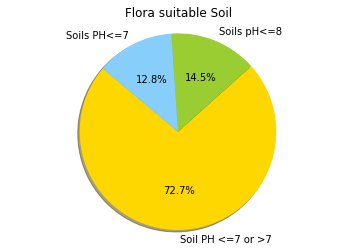

In [17]:
# Data to plot
labels = 'Soil PH <=7 or >7','Soils pH<=8', 'Soils PH<=7'
sizes = [anc.count(), c.count(), an.count()]
colors = ['gold', 'yellowgreen', 'lightskyblue']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Flora suitable Soil')
plt.axis('equal')
plt.show()


### Frost resistant Pie Chart

__This part is for Frost resistant visualization__

In [18]:
df['Frost'].unique()

array(['R', 'M', 'S/M', 'S'], dtype=object)

In [19]:
r = df[df.Frost == 'R']['Frost']
m = df[df.Frost == 'M']['Frost']
sm = df[df.Frost == 'S/M']['Frost']
s = df[df.Frost == 'S']['Frost']

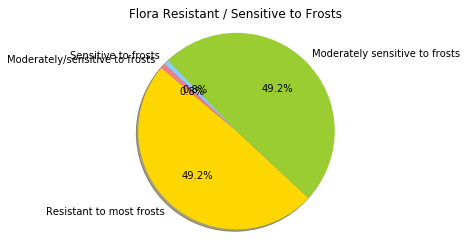

In [20]:
# Data to plot
labels = 'Resistant to most frosts','Moderately sensitive to frosts', 'Sensitive to frosts', 'Moderately/sensitive to frosts'
sizes = [r.count(), m.count(), s.count(), sm.count()]
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Flora Resistant / Sensitive to Frosts')
plt.axis('equal')
plt.show()

### Soil Texture

__This part is for Soil Texture needed by flora visualization__

In [23]:
df['Soil texture'].unique()

array(['Sa,Lo,Cl', 'Sa,Lo,Li', 'Sa,Lo,Cl,Li', 'Sa, Lo, Li', 'Lo,Cl',
       'Sa,Lo', 'Sa,Lo,Cl Li', 'Sa,Cl,Lo,Li', 'Lo,Li,Cl', 'Cl,Lo,Li',
       'Sa,Li', 'Sa, Lo', 'Sa, Lo, Cl', 'Lo, Cl', 'Lo, Cl, Li',
       'Sa,Lo, Cl, Li', 'Sa, Li, Cl,Li', 'Sa,Lo, Cl', 'Sa,,Lo,Cl,Li',
       'Sa,Lo,Cl/Lo', 'Sa, Lo,Cl', 'Sa Lo Cl'], dtype=object)

In [26]:
length = len(df['Type'])
sa = 0
li = 0
cl = 0
lo = 0
for i in range(length):
    if type(df['Soil texture'][i]) != str:
        continue
    if bool(re.match(r'(.*?)Sa(.*?)', df['Soil texture'][i], re.IGNORECASE)):
        sa += 1
    
    if bool(re.match(r'(.*?)Lo(.*?)', df['Soil texture'][i], re.IGNORECASE)):
        lo += 1
        
    if bool(re.match(r'(.*?)Cl(.*?)', df['Soil texture'][i], re.IGNORECASE)):
        cl += 1
    if bool(re.match(r'(.*?)Li(.*?)', df['Soil texture'][i], re.IGNORECASE)):
        li += 1
    

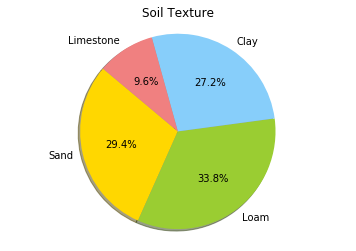

In [27]:
# Data to plot
labels = 'Sand','Loam', 'Clay', 'Limestone'
sizes = [sa, lo, cl, li]
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Soil Texture')
plt.axis('equal')
plt.show()

### Annual Rain 

__This part is for Annual Rain needed by flora visualization__

In [28]:
df['Rain (mm)'].unique()

array([300, 350, 250, 200, 550, 500, 450, 150, 325, 600, 400, 650, 750,
       700, 800, 'AQU'], dtype=object)

In [29]:
pre_list = df['Rain (mm)'].unique()
rain_list = []
rain_dict = {}
for each in pre_list:
    if type(each) == int:
        rain_list.append(each)
        
for each in rain_list:
    rain_dict[each] = 0
    
    
for i in range(length):
    if type(df['Rain (mm)'][i]) != int:
        continue
    rain_dict[df['Rain (mm)'][i]] += 1

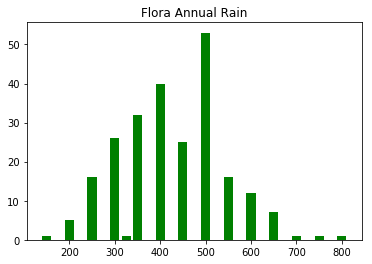

In [30]:
plt.bar(list(rain_dict.keys()), rain_dict.values(), width=20, color='g')
plt.title('Flora Annual Rain')
plt.show()

# SQL Quiries

__This part is used for auto making sql queries__

In [35]:
def pri(list1):
    new_list = []
    for each in list1:
        new_list.append((each,""))
    return print(new_list)

In [36]:
genus_list = list(df['Genus'].unique())
pri(genus_list)

[('Acacia ', ''), ('Adriana', ''), ('Allocasuarina', ''), ('Atriplex', ''), ('Babingtonia syn Baeckea', ''), ('Banksia', ''), ('Bauera', ''), ('Boronia ', ''), ('Brachychiton', ''), ('Callistemon', ''), ('Casuarina', ''), ('Cheiranthera', ''), ('Correa', ''), ('Corymbia  formerly Eucalyptus', ''), ('Crowea ', ''), ('Daviesia ', ''), ('Dillwynia', ''), ('Dodonaea', ''), ('Eremophila', ''), ('Eucalyptus ', ''), ('Glischrocaryon', ''), ('Goodenia', ''), ('Grevillea', ''), ('Hakea', ''), ('Hardenbergia', ''), ('Hibbertia', ''), ('Hybanthus', ''), ('Isopogon', ''), ('Lasiopetalum', ''), ('Leptospermum', ''), ('Leucophyta', ''), ('Leucopogon', ''), ('Linum ', ''), ('Maireana', ''), ('Melaleuca', ''), ('Micromyrtus', ''), ('Myoporum', ''), ('Olearia', ''), ('Philotheca Syn:Eriostemon', ''), ('Pimelea', ''), ('Platylobium', ''), ('Prostanthera', ''), ('Pultenaea', ''), ('Rhagodia', ''), ('Senna', ''), ('Solanum ', ''), ('Syzygium', ''), ('Tetratheca', ''), ('Thomasia', ''), ('Thryptomene', '')

In [37]:
df.columns

Index(['Type', 'Genus', 'Tube colour', 'Botanical name', 'Common name',
       'Height (m)', 'Spread (m)', 'Rain (mm)', 'Soil texture', 'Soil pH',
       'Frost', 'Flower colour', 'Flower (time)', 'plantid'],
      dtype='object')

In [38]:
df_plants = df[[ 'plantid', 'Tube colour','Botanical name', 'Common name',
       'Height (m)', 'Spread (m)', 'Rain (mm)', 'Type', 'Genus', 'Soil pH',
       'Frost']]

In [39]:
new_list = []
for index, row in df_plants.iterrows():
    if row.Frost == 'S/M':
        row.Frost = 'S'
        print(index)
    print((row['plantid'],row['Tube colour'],row['Botanical name'],row['Common name'], 
                    str(row['Height (m)']),str(row['Spread (m)']),str(row['Rain (mm)']),row['Type'],row['Genus'],
                    row['Soil pH'],row['Frost']), ",")

(0, 'B', 'acinacea ', 'round-leaved wattle', '1-2', '1-2', '300', 'Trees and Shrubs', 'Acacia ', 'ANC', 'R') ,
(1, 'B', 'argyrophylla', 'golden-grey mulga', '1-5', '2-6', '350', 'Trees and Shrubs', 'Acacia ', 'ANC', 'R') ,
(2, 'B', 'brachybotrya', 'grey mulga', '2-4', '1.5-4', '250', 'Trees and Shrubs', 'Acacia ', 'ANC', 'R') ,
(3, 'B', 'calamifolia', 'wallowa ', '2-5', '2-4', '200', 'Trees and Shrubs', 'Acacia ', 'ANC', 'M') ,
(4, 'B', 'farinosa', 'mealy wattle', '1-2', '2-4', '350', 'Trees and Shrubs', 'Acacia ', 'ANC', 'M') ,
(5, 'B', 'floribunda', 'gossamer wattle', '4-7', '4-6', '550', 'Trees and Shrubs', 'Acacia ', 'AN/C', 'M') ,
(6, 'B', 'glandulicarpa', 'hairy-pod wattle', '1-3', '1-3', '350', 'Trees and Shrubs', 'Acacia ', 'ANC', 'R') ,
(7, 'B', 'gunnii', 'ploughshare wattle', '0.2-0.8', '1-2', '500', 'Trees and Shrubs', 'Acacia ', 'AN', 'R') ,
(8, 'B', 'hakeoides', 'hakea wattle', '2.5-4', '3-5', '250', 'Trees and Shrubs', 'Acacia ', 'ANC', 'R') ,
(9, 'B', 'howittii', 'sticky

### df_so_tex

In [41]:
df_so_tex = df[['plantid', 'Soil texture']]

In [88]:
new_df = pd.DataFrame(columns=['plantid', 'Soil texture'])

for index, row in df_so_tex.iterrows():
    new_list = row['Soil texture'].replace('/',',').replace(' ',',').split(',')
    new_list = [i for i in new_list if i != '']
    for each in new_list:
        tmp = pd.DataFrame({'plantid': [index], 'Soil texture': [each]})
        new_df = new_df.append(tmp, ignore_index = True)

In [89]:
new_df

,plantid,Soil texture
0,0,Sa
1,0,Lo
2,0,Cl
3,1,Sa
4,1,Lo
5,1,Li
6,2,Sa
7,2,Lo
8,2,Cl
9,2,Li


In [45]:
new_list = []
for index, row in new_df.iterrows():
    new_list.append((row['plantid'], row['Soil texture']))

### df_fl

In [48]:
df_fl = df[['plantid','Flower (time)']]

In [49]:
df_fl['Flower (time)'].unique()

array(['W,Sp', 'W, Sp', 'Sp', 'A,W,Sp', 'Sp,S', 'W,Sp,S', 'A,W', 'F',
       'Sp,S,A', 'A, W', 'Sp, S', 'S, A', 'S', 'S,W,Sp', 'S,W', 'S,A',
       'S, W', 'Sp, S,A', 'All year', '`W,Sp', 'Sp,A', 'Sp,Su', 'A'],
      dtype=object)

In [60]:
new_df

,plantid,Flower (time)
0,0,W
1,0,Sp
2,1,W
3,1,Sp
4,2,W
5,2,Sp
6,3,W
7,3,Sp
8,4,W
9,4,Sp


In [93]:
new_df = pd.DataFrame(columns=['plantid', 'Flower (time)'])
new_list = []
for index, row in df_fl.iterrows():
    if row['Flower (time)'] == 'All year':
        tmp = pd.DataFrame({'plantid': [index], 'Flower (time)': ['All year']})
        new_df = new_df.append(tmp, ignore_index = True)
        continue
    
    new_list = row['Flower (time)'].replace(' ',',').split(',')
    new_list = [i for i in new_list if i != '']
    for each in new_list:
        if each == 'Su':
            each = 'S'
        tmp = pd.DataFrame({'plantid': [index], 'Flower (time)': [each]})
        new_df = new_df.append(tmp, ignore_index = True)

In [94]:
new_list = []
for index, row in new_df.iterrows():
    new_list.append((row['plantid'], row['Flower (time)']))

In [97]:
new_df['Flower (time)'].unique()

array(['W', 'Sp', 'A', 'S', 'F', 'All year', '`W'], dtype=object)

In [99]:
new_df[new_df['Flower (time)'] ==  '`W']

,plantid,Flower (time)
335,187,`W


In [96]:
new_list

[(0, 'W'),
 (0, 'Sp'),
 (1, 'W'),
 (1, 'Sp'),
 (2, 'W'),
 (2, 'Sp'),
 (3, 'W'),
 (3, 'Sp'),
 (4, 'W'),
 (4, 'Sp'),
 (5, 'W'),
 (5, 'Sp'),
 (6, 'W'),
 (6, 'Sp'),
 (7, 'W'),
 (7, 'Sp'),
 (8, 'W'),
 (8, 'Sp'),
 (9, 'Sp'),
 (10, 'Sp'),
 (11, 'Sp'),
 (12, 'W'),
 (12, 'Sp'),
 (13, 'W'),
 (13, 'Sp'),
 (14, 'W'),
 (14, 'Sp'),
 (15, 'Sp'),
 (16, 'Sp'),
 (17, 'W'),
 (17, 'Sp'),
 (18, 'Sp'),
 (19, 'A'),
 (19, 'W'),
 (19, 'Sp'),
 (20, 'W'),
 (20, 'Sp'),
 (21, 'W'),
 (21, 'Sp'),
 (22, 'W'),
 (22, 'Sp'),
 (23, 'W'),
 (23, 'Sp'),
 (24, 'Sp'),
 (24, 'S'),
 (25, 'W'),
 (25, 'Sp'),
 (26, 'Sp'),
 (27, 'W'),
 (27, 'Sp'),
 (27, 'S'),
 (28, 'W'),
 (28, 'Sp'),
 (28, 'S'),
 (29, 'W'),
 (29, 'Sp'),
 (30, 'Sp'),
 (30, 'S'),
 (31, 'Sp'),
 (32, 'Sp'),
 (32, 'S'),
 (33, 'A'),
 (33, 'W'),
 (33, 'Sp'),
 (34, 'A'),
 (34, 'W'),
 (35, 'A'),
 (35, 'W'),
 (36, 'A'),
 (36, 'W'),
 (37, 'F'),
 (38, 'F'),
 (39, 'F'),
 (40, 'F'),
 (41, 'Sp'),
 (41, 'S'),
 (42, 'F'),
 (43, 'Sp'),
 (43, 'S'),
 (43, 'A'),
 (44, 'A'),
 (44, 'W'),

### df_fc 

In [79]:
df_fc = df[['plantid', 'Flower colour']]

In [83]:
df_fc['Flower colour'].unique()

array(['Y', 'R/Br', 'I', 'R,Br', 'W', 'Y/B', 'W, Pk', 'B,W', 'Pk',
       'Cr/Pk', 'R', 'Cr', 'B', 'G,Cr', 'G/R', 'Y/R', 'O/R', 'Pu',
       'Cr, Pk', 'Cr,Pk,R', 'R,Pk,Cr', 'Pk,Cr', 'Cr,Pk', 'Bu/R', 'R, G',
       'Pk,W', 'Y,Br', 'Y/Pk', 'Pk,Pu', 'Pk/Pu', 'W/Pk', 'W,Pk,Pu',
       'W,Pk', 'O&R', 'R,Y', 'B/Pu', 'Pk, W', 'Pu/Pk', 'B, W', 'O,Y',
       'W&Pu', 'G', 'G/Br', 'Br', 'Br/Bl', 'G/Cr', 'Cr/Y', 'P', 'Pk, P'],
      dtype=object)

In [81]:
df_fc

,plantid,Flower colour
0,0,Y
1,1,Y
2,2,Y
3,3,Y
4,4,Y
5,5,Y
6,6,Y
7,7,Y
8,8,Y
9,9,Y


In [106]:
new_df = pd.DataFrame(columns=['plantid', 'Flower colour'])
new_list = []
for index, row in df_fc.iterrows():
    new_list = row['Flower colour'].replace(' ',',').replace('/',',').replace('&',",").split(',')
    new_list = [i for i in new_list if i != '']
    for each in new_list:
        if each == 'P':
            each = 'Pk'
        tmp = pd.DataFrame({'plantid': [index], 'Flower colour': [each]})
        new_df = new_df.append(tmp, ignore_index = True)

In [107]:
new_df

,plantid,Flower colour
0,0,Y
1,1,Y
2,2,Y
3,3,Y
4,4,Y
5,5,Y
6,6,Y
7,7,Y
8,8,Y
9,9,Y


In [108]:
new_df['Flower colour'].unique()

array(['Y', 'R', 'Br', 'I', 'W', 'B', 'Pk', 'Cr', 'G', 'O', 'Pu', 'Bu',
       'Bl'], dtype=object)

In [110]:
new_list = []
for index, row in new_df.iterrows():
    new_list.append((row['plantid'], row['Flower colour']))

In [111]:
new_list

[(0, 'Y'),
 (1, 'Y'),
 (2, 'Y'),
 (3, 'Y'),
 (4, 'Y'),
 (5, 'Y'),
 (6, 'Y'),
 (7, 'Y'),
 (8, 'Y'),
 (9, 'Y'),
 (10, 'Y'),
 (11, 'Y'),
 (12, 'Y'),
 (13, 'Y'),
 (14, 'Y'),
 (15, 'Y'),
 (16, 'Y'),
 (17, 'Y'),
 (18, 'Y'),
 (19, 'Y'),
 (20, 'Y'),
 (21, 'Y'),
 (22, 'Y'),
 (23, 'Y'),
 (24, 'Y'),
 (25, 'Y'),
 (26, 'Y'),
 (27, 'Y'),
 (28, 'Y'),
 (29, 'Y'),
 (30, 'R'),
 (30, 'Br'),
 (31, 'I'),
 (32, 'I'),
 (33, 'I'),
 (34, 'R'),
 (34, 'Br'),
 (35, 'R'),
 (35, 'Br'),
 (36, 'R'),
 (36, 'Br'),
 (37, 'I'),
 (38, 'I'),
 (39, 'I'),
 (40, 'I'),
 (41, 'W'),
 (42, 'Y'),
 (43, 'Y'),
 (44, 'Y'),
 (44, 'B'),
 (45, 'Y'),
 (46, 'Y'),
 (47, 'W'),
 (47, 'Pk'),
 (48, 'B'),
 (48, 'W'),
 (49, 'Pk'),
 (50, 'Cr'),
 (50, 'Pk'),
 (51, 'R'),
 (52, 'R'),
 (53, 'Y'),
 (54, 'Cr'),
 (55, 'I'),
 (56, 'R'),
 (57, 'B'),
 (58, 'W'),
 (59, 'G'),
 (59, 'Cr'),
 (60, 'G'),
 (60, 'R'),
 (61, 'Cr'),
 (62, 'Pk'),
 (63, 'Y'),
 (63, 'R'),
 (64, 'O'),
 (64, 'R'),
 (65, 'I'),
 (66, 'I'),
 (67, 'B'),
 (68, 'Pu'),
 (69, 'Cr'),
 (69, 'Pk'),

## API

In [ ]:
import requests
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('http://httpbin.org/get', params=payload)


In [198]:
import requests
import json
api_url_base = 'https://trefle.io/api/plants'
api_token = 'NDdUcFg4SnVNbXlXcHFXTGZweUVJdz09'
headers = {'Content-Type': 'application/json',
           'Authorization': 'NDdUcFg4SnVNbXlXcHFXTGZweUVJdz09'}
response = requests.get(api_url_base, headers = headers)

print(response.status_code)

200


In [93]:
import requests
payload = {'id': 123}
headers = {'content-type': 'application/json',
            'Authorization': 'NDdUcFg4SnVNbXlXcHFXTGZweUVJdz09'}
r = requests.get('https://trefle.io/api/kingdoms', headers = headers, params=payload)
json.loads(r.text)

[{'subkingdoms': [{'slug': 'tracheobionta',
    'name': 'Tracheobionta',
    'link': 'http://trefle.io/api/subkingdoms/1',
    'id': 1}],
  'slug': None,
  'name': 'Plantae',
  'id': 1}]

In [321]:
df['Soil pH'].unique()

array(['ANC', 'AN/C', 'AN'], dtype=object)

In [59]:
import requests
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('http://httpbin.org/get', params=payload)
print(r)

<Response [200]>


In [261]:
df

,Type,Genus,Tube colour,Botanical name,Common name,Height (m),Spread (m),Rain (mm),Soil texture,Soil pH,Frost,Flower colour,Flower (time)
0,Trees and Shrubs,Acacia,B,acinacea,round-leaved wattle,1-2,1-2,300,"Sa,Lo,Cl",ANC,R,Y,"W,Sp"
1,Trees and Shrubs,Acacia,B,argyrophylla,golden-grey mulga,1-5,2-6,350,"Sa,Lo,Li",ANC,R,Y,"W,Sp"
2,Trees and Shrubs,Acacia,B,brachybotrya,grey mulga,2-4,1.5-4,250,"Sa,Lo,Cl,Li",ANC,R,Y,"W,Sp"
3,Trees and Shrubs,Acacia,B,calamifolia,wallowa,2-5,2-4,200,"Sa,Lo,Cl,Li",ANC,M,Y,"W,Sp"
4,Trees and Shrubs,Acacia,B,farinosa,mealy wattle,1-2,2-4,350,"Sa, Lo, Li",ANC,M,Y,"W, Sp"
5,Trees and Shrubs,Acacia,B,floribunda,gossamer wattle,4-7,4-6,550,"Lo,Cl",AN/C,M,Y,"W,Sp"
6,Trees and Shrubs,Acacia,B,glandulicarpa,hairy-pod wattle,1-3,1-3,350,"Sa,Lo",ANC,R,Y,"W,Sp"
7,Trees and Shrubs,Acacia,B,gunnii,ploughshare wattle,0.2-0.8,1-2,500,"Sa,Lo,Cl",AN,R,Y,"W,Sp"
8,Trees and Shrubs,Acacia,B,hakeoides,hakea wattle,2.5-4,3-5,250,"Sa,Lo",ANC,R,Y,"W,Sp"
9,Trees and Shrubs,Acacia,B,howittii,sticky wattle,4-8,3-6,450,"Lo,Cl",ANC,R,Y,Sp


In [318]:
import requests
payload = {'common_name':'blackwood'}
headers = {'content-type': 'application/json',
            'Authorization': 'NDdUcFg4SnVNbXlXcHFXTGZweUVJdz09'}
r = requests.get('https://trefle.io/api/plants', headers = headers, params=payload)
json.loads(r.text)

[{'slug': 'acacia-penninervis',
  'scientific_name': 'Acacia penninervis',
  'link': 'http://trefle.io/api/plants/101452',
  'id': 101452,
  'complete_data': False,
  'common_name': 'blackwood'},
 {'slug': 'acacia-melanoxylon',
  'scientific_name': 'Acacia melanoxylon',
  'link': 'http://trefle.io/api/plants/101419',
  'id': 101419,
  'complete_data': True,
  'common_name': 'blackwood'}]

In [319]:
headers = {'content-type': 'application/json',
            'Authorization': 'NDdUcFg4SnVNbXlXcHFXTGZweUVJdz09'}
r = requests.get('https://trefle.io/api/plants/101452', headers = headers)
json.loads(r.text)

{'varieties': [],
 'sub_species': [],
 'scientific_name': 'Acacia penninervis',
 'order': {'slug': 'fabales',
  'name': 'Fabales',
  'link': 'http://trefle.io/api/division_orders/8',
  'id': 8},
 'native_status': None,
 'main_species': {'year': None,
  'type': 'species',
  'synonym': False,
  'status': 'Unknown',
  'specifications': {'toxicity': None,
   'shape_and_orientation': None,
   'regrowth_rate': None,
   'nitrogen_fixation': None,
   'max_height_at_base_age': {'ft': None, 'cm': None},
   'mature_height': {'ft': None, 'cm': None},
   'low_growing_grass': None,
   'lifespan': None,
   'leaf_retention': None,
   'known_allelopath': None,
   'growth_rate': None,
   'growth_period': None,
   'growth_habit': None,
   'growth_form': None,
   'fire_resistance': None,
   'fall_conspicuous': None,
   'coppice_potential': None,
   'c_n_ratio': None,
   'bloat': None},
  'sources': [{'species_id': 101452,
    'source_url': 'https://plants.usda.gov',
    'name': 'USDA',
    'last_update': 

In [302]:
import requests
payload = {'page_size': 100000000}
headers = {'content-type': 'application/json',
            'Authorization': 'NDdUcFg4SnVNbXlXcHFXTGZweUVJdz09'}
r = requests.get('https://trefle.io/api/plants', headers = headers, params=payload)
total = json.loads(r.text)

In [303]:
outF = open('myOutFile.txt','w')
for line in total:
    outF.write(str(line))
    outF.write('\n')
outF.close()

<function TextIOWrapper.close()>

In [305]:
total

[{'slug': 'centaurea-trichocephala',
  'scientific_name': 'Centaurea trichocephala',
  'link': 'http://trefle.io/api/plants/118318',
  'id': 118318,
  'complete_data': False,
  'common_name': 'feather-head knapweed'},
 {'slug': 'cerastium-strictum',
  'scientific_name': 'Cerastium strictum',
  'link': 'http://trefle.io/api/plants/118581',
  'id': 118581,
  'complete_data': False,
  'common_name': None},
 {'slug': 'ceratopteris-deltoidea',
  'scientific_name': 'Ceratopteris deltoidea',
  'link': 'http://trefle.io/api/plants/118723',
  'id': 118723,
  'complete_data': False,
  'common_name': None},
 {'slug': 'cichorium',
  'scientific_name': 'Cichorium',
  'link': 'http://trefle.io/api/plants/120544',
  'id': 120544,
  'complete_data': False,
  'common_name': 'chicory'},
 {'slug': 'chamaesyce-cowellii',
  'scientific_name': 'Chamaesyce cowellii',
  'link': 'http://trefle.io/api/plants/119382',
  'id': 119382,
  'complete_data': False,
  'common_name': "Cowell's sandmat"},
 {'slug': 'cham

In [247]:
payload = {'q': 'acinacea'}
headers = {'content-type': 'application/json',
            'Authorization': 'NDdUcFg4SnVNbXlXcHFXTGZweUVJdz09'}
r = requests.get('https://trefle.io/api/plants', headers = headers)
json.loads(r.text)

[{'slug': 'dyckia-macracantha',
  'scientific_name': 'Dyckia macracantha',
  'link': 'http://trefle.io/api/plants/294231',
  'id': 294231,
  'complete_data': False,
  'common_name': None},
 {'slug': 'dyckia-goiana',
  'scientific_name': 'Dyckia goiana',
  'link': 'http://trefle.io/api/plants/294252',
  'id': 294252,
  'complete_data': False,
  'common_name': None},
 {'slug': 'dyckia-lagoensis',
  'scientific_name': 'Dyckia lagoensis',
  'link': 'http://trefle.io/api/plants/294267',
  'id': 294267,
  'complete_data': False,
  'common_name': None},
 {'slug': 'dyckia-pseudococcinea',
  'scientific_name': 'Dyckia pseudococcinea',
  'link': 'http://trefle.io/api/plants/294275',
  'id': 294275,
  'complete_data': False,
  'common_name': None},
 {'slug': 'puya-lehmanniana',
  'scientific_name': 'Puya lehmanniana',
  'link': 'http://trefle.io/api/plants/293882',
  'id': 293882,
  'complete_data': False,
  'common_name': None},
 {'slug': 'pitcairnia-furfuracea',
  'scientific_name': 'Pitcairnia

In [206]:
df

,Type,Genus,Tube colour,Botanical name,Common name,Height (m),Spread (m),Rain (mm),Soil texture,Soil pH,Frost,Flower colour,Flower (time)
0,Trees and Shrubs,Acacia,B,acinacea,round-leaved wattle,1-2,1-2,300,"Sa,Lo,Cl",ANC,R,Y,"W,Sp"
1,Trees and Shrubs,Acacia,B,argyrophylla,golden-grey mulga,1-5,2-6,350,"Sa,Lo,Li",ANC,R,Y,"W,Sp"
2,Trees and Shrubs,Acacia,B,brachybotrya,grey mulga,2-4,1.5-4,250,"Sa,Lo,Cl,Li",ANC,R,Y,"W,Sp"
3,Trees and Shrubs,Acacia,B,calamifolia,wallowa,2-5,2-4,200,"Sa,Lo,Cl,Li",ANC,M,Y,"W,Sp"
4,Trees and Shrubs,Acacia,B,farinosa,mealy wattle,1-2,2-4,350,"Sa, Lo, Li",ANC,M,Y,"W, Sp"
5,Trees and Shrubs,Acacia,B,floribunda,gossamer wattle,4-7,4-6,550,"Lo,Cl",AN/C,M,Y,"W,Sp"
6,Trees and Shrubs,Acacia,B,glandulicarpa,hairy-pod wattle,1-3,1-3,350,"Sa,Lo",ANC,R,Y,"W,Sp"
7,Trees and Shrubs,Acacia,B,gunnii,ploughshare wattle,0.2-0.8,1-2,500,"Sa,Lo,Cl",AN,R,Y,"W,Sp"
8,Trees and Shrubs,Acacia,B,hakeoides,hakea wattle,2.5-4,3-5,250,"Sa,Lo",ANC,R,Y,"W,Sp"
9,Trees and Shrubs,Acacia,B,howittii,sticky wattle,4-8,3-6,450,"Lo,Cl",ANC,R,Y,Sp


In [22]:
df

,Type,Genus,Tube colour,Botanical name,Common name,Height (m),Spread (m),Rain (mm),Soil texture,Soil pH,Frost,Flower colour,Flower (time)
0,Trees and Shrubs,Acacia,B,acinacea,round-leaved wattle,1-2,1-2,300,"Sa,Lo,Cl",ANC,R,Y,"W,Sp"
1,Trees and Shrubs,Acacia,B,argyrophylla,golden-grey mulga,1-5,2-6,350,"Sa,Lo,Li",ANC,R,Y,"W,Sp"
2,Trees and Shrubs,Acacia,B,brachybotrya,grey mulga,2-4,1.5-4,250,"Sa,Lo,Cl,Li",ANC,R,Y,"W,Sp"
3,Trees and Shrubs,Acacia,B,calamifolia,wallowa,2-5,2-4,200,"Sa,Lo,Cl,Li",ANC,M,Y,"W,Sp"
4,Trees and Shrubs,Acacia,B,farinosa,mealy wattle,1-2,2-4,350,"Sa, Lo, Li",ANC,M,Y,"W, Sp"
5,Trees and Shrubs,Acacia,B,floribunda,gossamer wattle,4-7,4-6,550,"Lo,Cl",AN/C,M,Y,"W,Sp"
6,Trees and Shrubs,Acacia,B,glandulicarpa,hairy-pod wattle,1-3,1-3,350,"Sa,Lo",ANC,R,Y,"W,Sp"
7,Trees and Shrubs,Acacia,B,gunnii,ploughshare wattle,0.2-0.8,1-2,500,"Sa,Lo,Cl",AN,R,Y,"W,Sp"
8,Trees and Shrubs,Acacia,B,hakeoides,hakea wattle,2.5-4,3-5,250,"Sa,Lo",ANC,R,Y,"W,Sp"
9,Trees and Shrubs,Acacia,B,howittii,sticky wattle,4-8,3-6,450,"Lo,Cl",ANC,R,Y,Sp


##### API 2

In [246]:
#payload = {'id': 136330}
headers = {'content-type': 'application/json',
           'Authorization': 'uL2GeF6SOtfhELcBbrzQ50pQUy4l86RyF1vwqqoGCDVbrfN72m'}
r = requests.post('https://api.plant.id/plant_info', headers = headers)
print(r)
#json.loads(r.text)

<Response [405]>


In [236]:
?request

,Type,Genus,Tube colour,Botanical name,Common name,Height (m),Spread (m),Rain (mm),Soil texture,Soil pH,Frost,Flower colour,Flower (time)
0,Trees and Shrubs,Acacia,B,acinacea,round-leaved wattle,1-2,1-2,300,"Sa,Lo,Cl",ANC,R,Y,"W,Sp"
1,Trees and Shrubs,Acacia,B,argyrophylla,golden-grey mulga,1-5,2-6,350,"Sa,Lo,Li",ANC,R,Y,"W,Sp"
2,Trees and Shrubs,Acacia,B,brachybotrya,grey mulga,2-4,1.5-4,250,"Sa,Lo,Cl,Li",ANC,R,Y,"W,Sp"
3,Trees and Shrubs,Acacia,B,calamifolia,wallowa,2-5,2-4,200,"Sa,Lo,Cl,Li",ANC,M,Y,"W,Sp"
4,Trees and Shrubs,Acacia,B,farinosa,mealy wattle,1-2,2-4,350,"Sa, Lo, Li",ANC,M,Y,"W, Sp"
5,Trees and Shrubs,Acacia,B,floribunda,gossamer wattle,4-7,4-6,550,"Lo,Cl",AN/C,M,Y,"W,Sp"
6,Trees and Shrubs,Acacia,B,glandulicarpa,hairy-pod wattle,1-3,1-3,350,"Sa,Lo",ANC,R,Y,"W,Sp"
7,Trees and Shrubs,Acacia,B,gunnii,ploughshare wattle,0.2-0.8,1-2,500,"Sa,Lo,Cl",AN,R,Y,"W,Sp"
8,Trees and Shrubs,Acacia,B,hakeoides,hakea wattle,2.5-4,3-5,250,"Sa,Lo",ANC,R,Y,"W,Sp"
9,Trees and Shrubs,Acacia,B,howittii,sticky wattle,4-8,3-6,450,"Lo,Cl",ANC,R,Y,Sp


In [325]:
df['plantid'] = np.nan

In [326]:
df['plantid'] = df.index

In [329]:
df_new

,plantid,Tube colour,Botanical name,Common name,Height (m),Spread (m),Rain (mm),Type,Genus,Soil pH,Frost
0,0,B,acinacea,round-leaved wattle,1-2,1-2,300,Trees and Shrubs,Acacia,ANC,R
1,1,B,argyrophylla,golden-grey mulga,1-5,2-6,350,Trees and Shrubs,Acacia,ANC,R
2,2,B,brachybotrya,grey mulga,2-4,1.5-4,250,Trees and Shrubs,Acacia,ANC,R
3,3,B,calamifolia,wallowa,2-5,2-4,200,Trees and Shrubs,Acacia,ANC,M
4,4,B,farinosa,mealy wattle,1-2,2-4,350,Trees and Shrubs,Acacia,ANC,M
5,5,B,floribunda,gossamer wattle,4-7,4-6,550,Trees and Shrubs,Acacia,AN/C,M
6,6,B,glandulicarpa,hairy-pod wattle,1-3,1-3,350,Trees and Shrubs,Acacia,ANC,R
7,7,B,gunnii,ploughshare wattle,0.2-0.8,1-2,500,Trees and Shrubs,Acacia,AN,R
8,8,B,hakeoides,hakea wattle,2.5-4,3-5,250,Trees and Shrubs,Acacia,ANC,R
9,9,B,howittii,sticky wattle,4-8,3-6,450,Trees and Shrubs,Acacia,ANC,R


In [ ]:
df = 

### PLANT_INFO TABLE

In [330]:
df_new = df[['plantid', 'Tube colour', 'Botanical name', 'Common name', 
             'Height (m)', 'Spread (m)', 'Rain (mm)', 'Type', 'Genus','Soil pH','Frost']]
df_new.to_csv('PLANT_INFO.CSV',index = False)

In [4]:
{
  "varieties": "list",
  "sub_species": "list",
  "scientific_name": "string",
  "order": {
    "slug": "string",
    "name": "string",
    "link": "string",
    "id": "integer"
  },
  "native_status": "string",
  "main_species": {
    "year": "string",
    "type": "string",
    "synonym": "string",
    "status": "string",
    "specifications": {
      "toxicity": "string",
      "shape_and_orientation": "string",
      "regrowth_rate": "string",
      "nitrogen_fixation": "string",
      "max_height_at_base_age": {
        "ft": "float",
        "cm": "float"
      },
      "mature_height": {
        "ft": "float",
        "cm": "float"
      },
      "low_growing_grass": "string",
      "lifespan": "string",
      "leaf_retention": "string",
      "known_allelopath": "string",
      "growth_rate": "string",
      "growth_period": "string",
      "growth_habit": "string",
      "growth_form": "string",
      "fire_resistance": "string",
      "fall_conspicuous": "string",
      "coppice_potential": "string",
      "c_n_ratio": "string",
      "bloat": "string"
    },
    "sources": [
      {
        "species_id": "integer",
        "source_url": "string",
        "name": "string",
        "last_update": "string"
      }
    ],
    "soils_adaptation": {
      "medium": "string",
      "fine": "string",
      "coarse": "string"
    },
    "slug": "string",
    "seed": {
      "vegetative_spread_rate": "string",
      "small_grain": "string",
      "seeds_per_pound": "string",
      "seedling_vigor": "string",
      "seed_spread_rate": "string",
      "commercial_availability": "string",
      "bloom_period": "string"
    },
    "scientific_name": "string",
    "propagation": {
      "tubers": "string",
      "sprigs": "string",
      "sod": "string",
      "seed": "string",
      "cuttings": "string",
      "corms": "string",
      "container": "string",
      "bulbs": "string",
      "bare_root": "string"
    },
    "products": {
      "veneer": "string",
      "pulpwood": "string",
      "protein_potential": "string",
      "post": "string",
      "palatable_human": "string",
      "palatable_graze_animal": "string",
      "palatable_browse_animal": "string",
      "nursery_stock": "string",
      "naval_store": "string",
      "lumber": "string",
      "fuelwood": "string",
      "fodder": "string",
      "christmas_tree": "string",
      "berry_nut_seed": "string"
    },
    "native_status": "string",
    "main_species_id": "string",
    "is_main_species": "string",
    "images": [
      {
        "url": "string"
      }
    ],
    "id": "integer",
    "growth": {
      "temperature_minimum": {
        "deg_f": "float",
        "deg_c": "float"
      },
      "shade_tolerance": "string",
      "salinity_tolerance": "string",
      "root_depth_minimum": {
        "inches": "float",
        "cm": "float"
      },
      "resprout_ability": "string",
      "precipitation_minimum": {
        "inches": "float",
        "cm": "float"
      },
      "precipitation_maximum": {
        "inches": "float",
        "cm": "float"
      },
      "planting_density_minimum": {
        "sqm": "float",
        "acre": "float"
      },
      "planting_density_maximum": {
        "sqm": "float",
        "acre": "float"
      },
      "ph_minimum": "float",
      "ph_maximum": "float",
      "moisture_use": "string",
      "hedge_tolerance": "string",
      "frost_free_days_minimum": "float",
      "fire_tolerance": "string",
      "fertility_requirement": "string",
      "drought_tolerance": "string",
      "cold_stratification_required": "string",
      "caco_3_tolerance": "string",
      "anaerobic_tolerance": "string"
    },
    "fruit_or_seed": {
      "seed_persistence": "string",
      "seed_period_end": "string",
      "seed_period_begin": "string",
      "seed_abundance": "string",
      "conspicuous": "string",
      "color": "string"
    },
    "foliage": {
      "texture": "string",
      "porosity_winter": "string",
      "porosity_summer": "string",
      "color": "string"
    },
    "flower": {
      "conspicuous": "string",
      "color": "string"
    },
    "family_common_name": "string",
    "duration": "string",
    "complete_data": "string",
    "common_name": "string",
    "bibliography": "string",
    "author": "string"
  },
  "images": [
    {
      "url": "string"
    }
  ],
  "id": "integer",
  "hybrids": "list",
  "genus": {
    "slug": "string",
    "name": "string",
    "link": "string",
    "id": "integer"
  },
  "forms": "list",
  "family_common_name": "string",
  "family": {
    "slug": "string",
    "name": "string",
    "link": "string",
    "id": "integer",
    "common_name": "string"
  },
  "duration": "string",
  "division": {
    "slug": "string",
    "name": "string",
    "link": "string",
    "id": "integer"
  },
  "cultivars": "list",
  "common_name": "string",
  "class": {
    "slug": "string",
    "name": "string",
    "link": "string",
    "id": "integer"
  }
}

{'varieties': 'list',
 'sub_species': 'list',
 'scientific_name': 'string',
 'order': {'slug': 'string',
  'name': 'string',
  'link': 'string',
  'id': 'integer'},
 'native_status': 'string',
 'main_species': {'year': 'string',
  'type': 'string',
  'synonym': 'string',
  'status': 'string',
  'specifications': {'toxicity': 'string',
   'shape_and_orientation': 'string',
   'regrowth_rate': 'string',
   'nitrogen_fixation': 'string',
   'max_height_at_base_age': {'ft': 'float', 'cm': 'float'},
   'mature_height': {'ft': 'float', 'cm': 'float'},
   'low_growing_grass': 'string',
   'lifespan': 'string',
   'leaf_retention': 'string',
   'known_allelopath': 'string',
   'growth_rate': 'string',
   'growth_period': 'string',
   'growth_habit': 'string',
   'growth_form': 'string',
   'fire_resistance': 'string',
   'fall_conspicuous': 'string',
   'coppice_potential': 'string',
   'c_n_ratio': 'string',
   'bloat': 'string'},
  'sources': [{'species_id': 'integer',
    'source_url': 'str